In [1]:
import numpy as np
import scipy 
from spectral import*
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from pysptools.material_count import vd as v
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#### Eigengap Approach based on paper "Estimating the Intrinsic Dimension of Hyperspectral Images Using a Noise-Whitened Eigengap Approach" 

In [2]:
path=r'<YOUR_DATA_PATH_HERE>'
data_slice=np.load(os.path.join(path,'data_train_por.npy'))
scaler=Normalizer()
data=scaler.fit_transform(data_slice) # Comment this line to avoid normalization of data 
Cov=np.cov(data.T)
E1t ,matLam = np.linalg.eig(Cov)
lamda,I= np.sort(E1t)[::-1],np.argsort(E1t)[::-1]
matLam=matLam[I]
import endmember_number_estimation
w, Rw = endmember_number_estimation.est_noise(data, noise_type='add')
PI=Cov-Rw
E2t, matLam2 = np.linalg.eig(PI)
lamda2,I2= np.sort(E2t)[::-1],np.argsort(E2t)[::-1]
matLam2=matLam2[I2]
rho =np.divide(np.diag(np.matmul(np.matmul(matLam.T,Rw),matLam2)),np.diag(np.matmul(matLam.T,matLam2)))
lamda= np.divide(lamda,rho)
vect = abs(np.diff(lamda))
sort_=np.diff(np.cumsum(vect/np.sum(vect)))
nb_endm=np.where(sort_>5e-3)[0][-1]+1

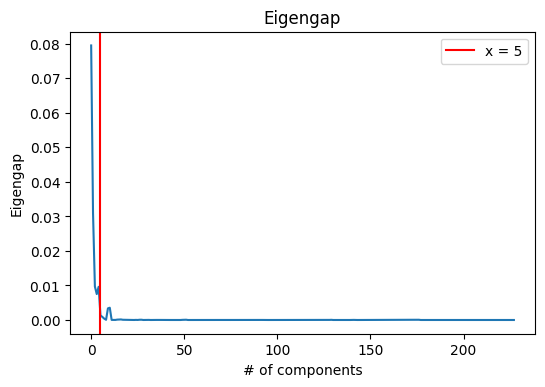

In [7]:
plt.figure(dpi=100)
plt.plot(sort_)
plt.axvline(x=nb_endm,color='red',label='x = '+ str(nb_endm))
plt.title('Eigengap')
plt.xlabel('# of components')
plt.ylabel('Eigengap')
plt.legend()